In [6]:
import sys; sys.path.append('/sj0243/')

In [7]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res, plot_ph_res_storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[5] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'
model_name = 'relxilllp'
AllModels.lmod('relxill', '/sj0243/python_for_nustar/relxill_model/')
calc_errors = True

AllModels.clear()
Xset.parallel.error = 22



pd.set_option('display.max_columns', 500)


###
Observation 90401334002 loaded successfully


## Phase-averaged spectra

deleted xspec/relxilllp/*90401334002_relxilllp* and xspec/relxilllp/xcm/*90401334002_relxilllp* files
Try loading storage xspec/relxilllp/90401334002_relxilllp.storage
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /sj0243/results/out90401334002/products/spe_and_lc
fitting done
skipping errors for: []
    18      1.01527      1.01816    (-0.00144244,0.00144527)
     3      3.01157       3.0571    (-0.0228184,0.0227094)
     4        1.766      1.84235    (-0.0374349,0.0389143)
     8      32.8936      39.4982    (-2.97058,3.63404)
    11      1.04349      1.07444    (-0.0154355,0.0155134)
    12      3.25417      3.39014    (-0.0616128,0.0743602)
    14      24.0896      25.3224    (-0.6006,0.632161)
    15    0.0682079    0.0811367    (-0.00483125,0.00809755)
    17     0.019561    0.0199855    (-0.000247923,0.000176533)
Fit done 
 chi2 = 2814.275194669319 for 2698 dof, chi2_red = 1.0430968104778795, H0 prob = 0.05823655182
<Storage with 2 containers

,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90401334002_relxilllp_FPMA,constant,factor,1,1.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
1,0,90401334002_relxilllp_FPMA,phabs,nH,2,0.800000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
2,0,90401334002_relxilllp_FPMA,bbodyrad,kT,3,3.034392,3.011568,3.057096,FFFFFFFFF,0.013704,False,
3,0,90401334002_relxilllp_FPMA,bbodyrad,norm,4,1.803433,1.765998,1.842347,FFFFFFFFF,0.022669,False,
4,0,90401334002_relxilllp_FPMA,relxilllp,h,5,5.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
5,0,90401334002_relxilllp_FPMA,relxilllp,a,6,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
6,0,90401334002_relxilllp_FPMA,relxilllp,Incl,7,10.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
7,0,90401334002_relxilllp_FPMA,relxilllp,Rin,8,35.864131,32.893551,39.498172,FFFFFFFFF,1.847530,False,
8,0,90401334002_relxilllp_FPMA,relxilllp,Rout,9,39.450544,0.000000,0.000000,FFFFFTFFF,0.000000,False,= 1.1*p8
9,0,90401334002_relxilllp_FPMA,relxilllp,z,10,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,


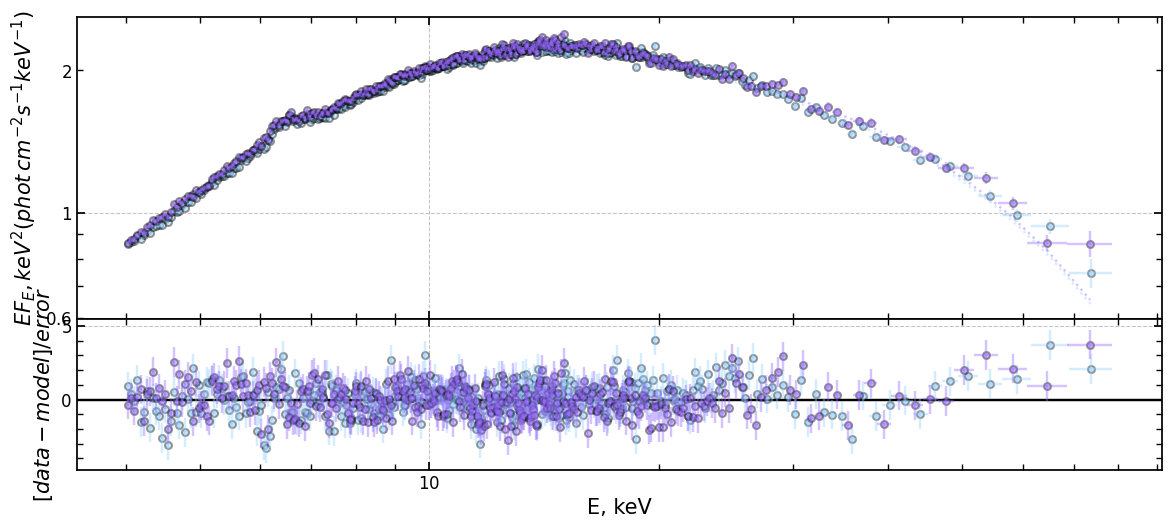

In [8]:
os.chdir(ph_ave_folder)
create_dir('xspec')



mo_cutoffpl = Model("constant*phabs*(bbodyrad+relxilllp)")
mo_cutoffpl.phabs.nH = '0.8 -1'



mo_cutoffpl.bbodyrad.kT = '3'
mo_cutoffpl.bbodyrad.norm = '2' # ,, 0.1, 0.2, 3, 4'



mo_cutoffpl.relxilllp.h = '5 -1'
mo_cutoffpl.relxilllp.a = '0 -1'
mo_cutoffpl.relxilllp.Incl = '10'
mo_cutoffpl.relxilllp.Incl.frozen = True
mo_cutoffpl.relxilllp.Rin = '35 0.1, 0, 0, 900, 900'
mo_cutoffpl.relxilllp.Rout = '=1.1*p8'
mo_cutoffpl.relxilllp.z = '0 -1'
mo_cutoffpl.relxilllp.gamma = '1.1  0.005 0.1 0.1 3 3'
mo_cutoffpl.relxilllp.logxi = '3.3'
mo_cutoffpl.relxilllp.Ecut = '24'
mo_cutoffpl.relxilllp.Ecut.frozen = False
mo_cutoffpl.relxilllp.refl_frac = '0.07'
mo_cutoffpl.relxilllp.fixReflFrac = '0'
mo_cutoffpl.relxilllp.Afe = '5 -1'
mo_cutoffpl.relxilllp.norm = '2e-2'


mo_fid_pars = fit_spectra(model = mo_cutoffpl, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors, eqw_comps='')
mo_fid_pars

# Phase-resolved

In [3]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model_name}/xcm/{ObsID}_{model_name}.xcm_model')

model = AllModels(1)
model.bbodyrad.kT.frozen = True
model.bbodyrad.norm.frozen = True
model.relxilllp.logxi.frozen = True
model.relxilllp.Rin.frozen = True


 *** loading RELXILL model (version 1.4.3) *** 


##################### bin number 2 #####################
deleted xspec/relxilllp/*90401334002_bin2_shift0_relxilllp* and xspec/relxilllp/xcm/*90401334002_bin2_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90401334002_bin2_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90401334002_bin2_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90401334002_bin2_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin2A_sr.pi and phase_resolved_bin2B_sr.pi from /sj0243/results/out90401334002/products/phase_resolved
fitting done
skipping errors for: []
Errorr fail with 18
    11     0.841038     0.900215    (-0.0295103,0.0296668)
    14      11.6058       12.395    (-0.381432,0.407711)


***Warning: New best fit found, fit parameters will be set to new values.
***Warning: auto-repeat is off for error calculation when new best fit found.



    15    0.0840969     0.129099    (-0.0223947,0.0226072)
Fit done 
 chi2 = 4517.891317896944 for 1402 dof, chi2_red = 3.2224617103401885, H0 prob = 3e-323
    17    0.0129616     0.013517    (-0.000271807,0.000283583)
<Storage with 2 containers>
##################### bin number 5 #####################
deleted xspec/relxilllp/*90401334002_bin5_shift0_relxilllp* and xspec/relxilllp/xcm/*90401334002_bin5_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90401334002_bin5_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90401334002_bin5_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90401334002_bin5_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin5A_sr.pi and phase_resolved_bin5B_sr.pi from /sj0243/results/out90401334002/products/phase_resolved
fitting done
skipping errors for: []
    18      1.01247      1.02074    (-0.00412497,0.00414145)
    11     0.817625     0.849969    (-0.0162228,0.0161205)
    14      16.6429       17.349    (-0.34757,0.358593)
    15    0.0529224    0.0792682    (-0.0130999,0.0132458)
    17    0.0240745    0.0246709    (-0.000295992,0.00030041)
Fit done 
 chi2 = 1680.3867448351057 for 1607 dof, chi2_red = 1.0456669227349755, H0 prob = 0.0990475694
<Storage with 2 containers>


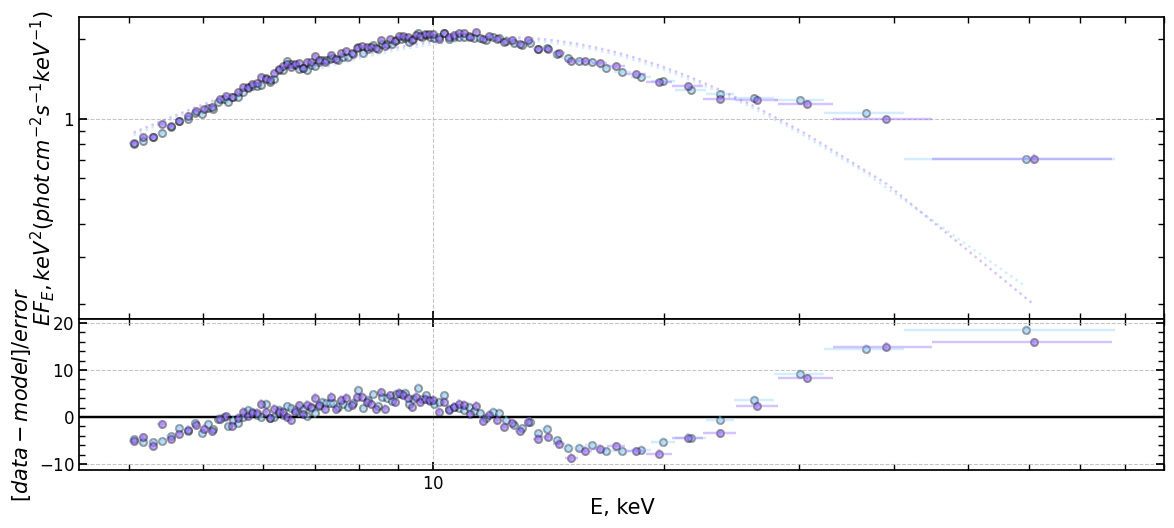

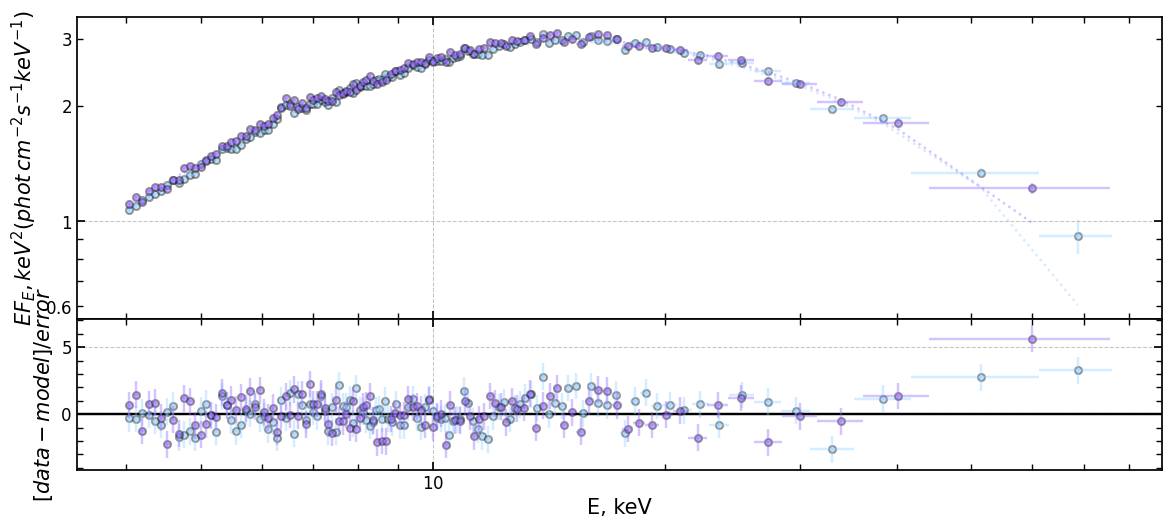

In [4]:
os.chdir(ph_res_folder)
create_dir('xspec')
for binnum in [2,5]:
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=False, eqw_comps='')
